In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.


(a) Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.

(b) Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [2]:
def calculate_Y(x, eps):
    return -1 + 0.5 * x + eps

In [3]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.25)) for _ in range(a)])
y = calculate_Y(x, eps)

(c) Using x and eps, generate a vector y according to the model 
                Y = −1+0.5X + e  (3.39)
What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [4]:
length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f'the length of the vector Y is: {length_y}')
print(f'β0 (intercept): {beta0}')
print(f'β1 (coeficiente para X): {beta1}')

the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

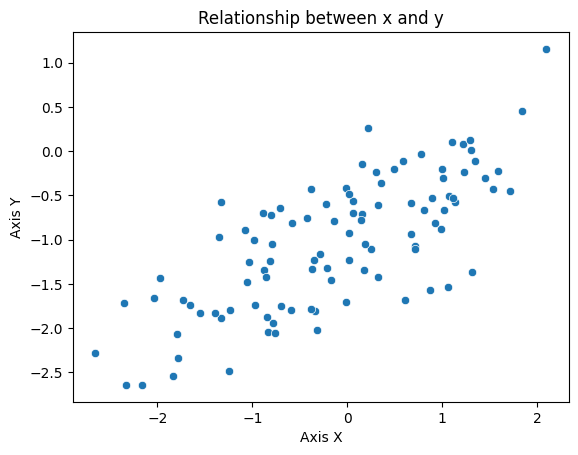

In [5]:
sb.scatterplot(x=x, y=y, marker='o')
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.title('Relationship between x and y')
plt.show()

Se observa una relación lineal positiva entre los datos

(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [6]:
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.08e-18
Time:                        22:53:12   Log-Likelihood:                -72.455
No. Observations:                 100   AIC:                             148.9
Df Residuals:                      98   BIC:                             154.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9733      0.051    -19.168      0.0

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a diferent color. Use the legend() method of the axes to create an appropriate legend.

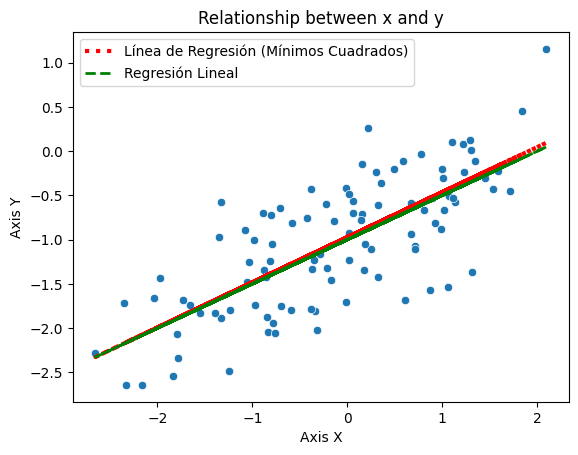

In [7]:
a, b = results.params
sb.scatterplot(x=x, y=y, marker='o')
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(x, y_pred_min_cuad, color='red', linestyle=':',label='Línea de Regresión (Mínimos Cuadrados)',lw=3)
plt.plot(x, y_real, color='green', linestyle='--', label='Regresión Lineal',lw=2)
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.title('Relationship between x and y')
plt.legend()
plt.show()

(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model ft? Explain your answer.

In [8]:
data={'x':x,'y':y}
res2 = smf.ols(formula='y ~ np.power(x,2) + x', data=data).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     59.41
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.43e-17
Time:                        22:53:12   Log-Likelihood:                -72.406
No. Observations:                 100   AIC:                             150.8
Df Residuals:                      97   BIC:                             158.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9869      0.067    -14.

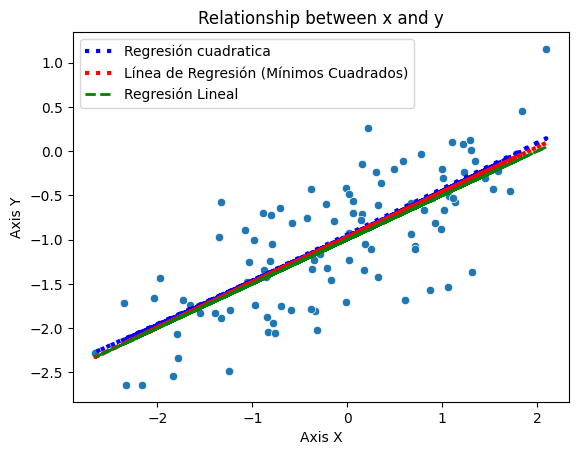

In [9]:
d, e, f = res2.params
sb.scatterplot(x=x, y=y, marker='o')
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
y_pred_quadratic = d + f * x + e * np.power(x,2) 
plt.plot(x, y_pred_quadratic, color='blue', linestyle=':',label='Regresión cuadratica',lw=3)
plt.plot(x, y_pred_min_cuad, color='red', linestyle=':',label='Línea de Regresión (Mínimos Cuadrados)',lw=3)
plt.plot(x, y_real, color='green', linestyle='--', label='Regresión Lineal',lw=2)
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.title('Relationship between x and y')
plt.legend()
plt.show()

El modelo cuadrativo mejora el modelo en 0.001 con respecto al modelo de regresión lineal en el indicador R-squared, sin emabrgo esto implica aumentar la complejidad del modelo y bajo el principio de parcimonia se adopta el modelo de menor complejidad.

(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term" in (b). Describe your results.

the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


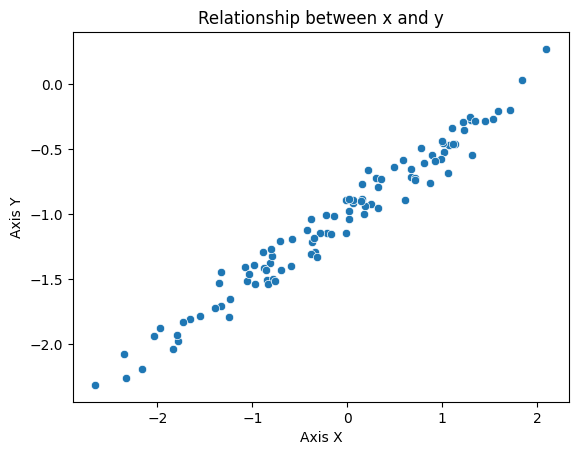

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2904.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.24e-74
Time:                        22:53:13   Log-Likelihood:                 88.489
No. Observations:                 100   AIC:                            -173.0
Df Residuals:                      98   BIC:                            -167.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9947      0.010    -97.945      0.0

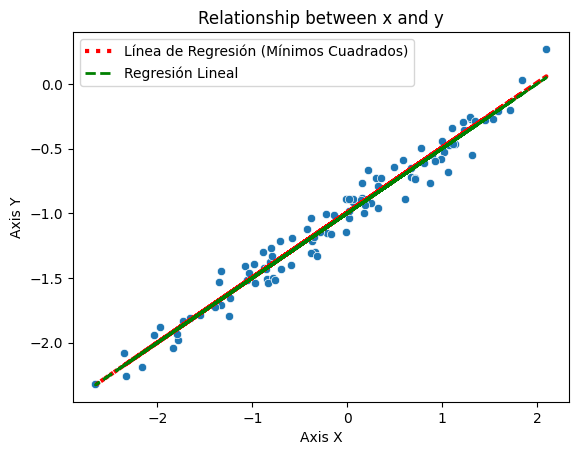

In [10]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.01)) for _ in range(a)])
y = calculate_Y(x, eps)

length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f'the length of the vector Y is: {length_y}')
print(f'β0 (intercept): {beta0}')
print(f'β1 (coeficiente para X): {beta1}')

sb.scatterplot(x=x, y=y, marker='o')
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.title('Relationship between x and y')
plt.show()


X = sm.add_constant(x)
model = sm.OLS(y, X)
results_less_noisy = model.fit()
print(results_less_noisy.summary())

a, b = results_less_noisy.params
sb.scatterplot(x=x, y=y, marker='o')
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(x, y_pred_min_cuad, color='red', linestyle=':',label='Línea de Regresión (Mínimos Cuadrados)',lw=3)
plt.plot(x, y_real, color='green', linestyle='--', label='Regresión Lineal',lw=2)
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.title('Relationship between x and y')
plt.legend()
plt.show()

Se evidencia que ante unos datos más homogeneos se obtiene una regresión lineal con mejor desempeño.

(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term " in (b). Describe your results.

the length of the vector Y is: 100
β0 (intercept): -1
β1 (coeficiente para X): 0.5


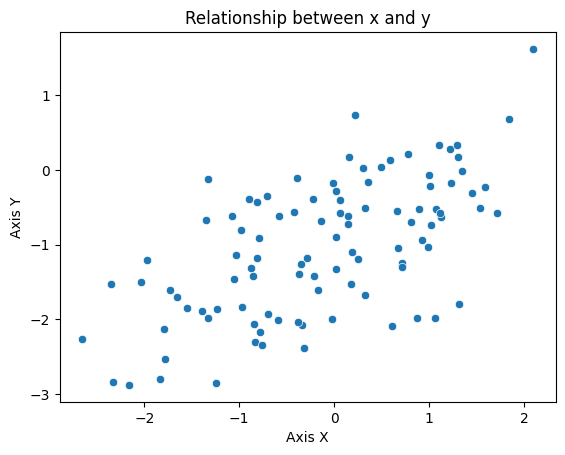

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     60.87
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           6.69e-12
Time:                        22:53:13   Log-Likelihood:                -107.11
No. Observations:                 100   AIC:                             218.2
Df Residuals:                      98   BIC:                             223.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9622      0.072    -13.400      0.0

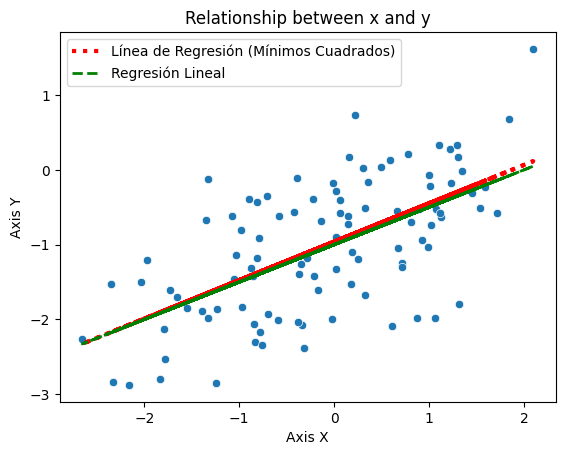

In [11]:
random.seed(1)
a = 100
x = np.array([random.normalvariate(0, 1) for _ in range(a)])
eps = np.array([random.normalvariate(0, np.sqrt(0.5)) for _ in range(a)])
y = calculate_Y(x, eps)

length_y = len(y)

beta0 = -1
beta1 = 0.5

print(f'the length of the vector Y is: {length_y}')
print(f'β0 (intercept): {beta0}')
print(f'β1 (coeficiente para X): {beta1}')

sb.scatterplot(x=x, y=y, marker='o')
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.title('Relationship between x and y')
plt.show()


X = sm.add_constant(x)
model = sm.OLS(y, X)
results_noisy  = model.fit()
print(results_noisy.summary())

a, b = results_noisy.params
sb.scatterplot(x=x, y=y, marker='o')
y_pred_min_cuad = a + b * x
y_real = beta0 + beta1 * x
plt.plot(x, y_pred_min_cuad, color='red', linestyle=':',label='Línea de Regresión (Mínimos Cuadrados)',lw=3)
plt.plot(x, y_real, color='green', linestyle='--', label='Regresión Lineal',lw=2)
plt.xlabel('Axis X')
plt.ylabel('Axis Y')
plt.title('Relationship between x and y')
plt.legend()
plt.show()

Se evidencia que ante unos datos más dispersos de obtiene un indicador R-squared con menor desempeño.

(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [12]:
original_b0, original_b1 = results.conf_int(alpha=0.05, cols=None)
less_noisy_b0, less_noisy_b1 = results_less_noisy.conf_int(alpha=0.05, cols=None)
noisy_b0, noisy_b1 = results_noisy.conf_int(alpha=0.05, cols=None)

In [13]:
print(f"el intervalo de confianza para el data set original de β0 es: {original_b0}")
print(f"el intervalo de confianza para el data set original de β1 es: {original_b1}")
print(f"el intervalo de confianza para el data con menos ruido de β0 es: {less_noisy_b0}")
print(f"el intervalo de confianza para el data con menos ruido de β1 es: {less_noisy_b1}")
print(f"el intervalo de confianza para el data set original de β0 es: {noisy_b0}")
print(f"el intervalo de confianza para el data set original de β1 es: {noisy_b1}")

el intervalo de confianza para el data set original de β0 es: [-1.07406523 -0.87253578]
el intervalo de confianza para el data set original de β1 es: [0.41742068 0.60228409]
el intervalo de confianza para el data con menos ruido de β0 es: [-1.01481305 -0.97450716]
el intervalo de confianza para el data con menos ruido de β1 es: [0.48348414 0.52045682]
el intervalo de confianza para el data set original de β0 es: [-1.10474406 -0.81973837]
el intervalo de confianza para el data set original de β1 es: [0.38321521 0.64465154]


In [14]:
diff_orignal_b0 = original_b0[1] - original_b0[0]
diff_orignal_b1 = original_b1[1] - original_b1[0]

diff_less_noisy_b0 = less_noisy_b0[1] - less_noisy_b0[0]
diff_less_noisy_b1 = less_noisy_b1[1] - less_noisy_b1[0]

diff_noisy_b0 = noisy_b0[1] - noisy_b0[0]
diff_noisy_b1 = noisy_b1[1] - noisy_b1[0]

In [15]:
print(f"rango del intervalo de confianza original b0: {diff_orignal_b0}")
print(f"rango del intervalo de confianza original b1: {diff_orignal_b1}")
print(f"rango del intervalo de confianza less noisy b0: {diff_less_noisy_b0}")
print(f"rango del intervalo de confianza less noisy b1: {diff_less_noisy_b1}")
print(f"rango del intervalo de confianza noisy b0: {diff_noisy_b0}")
print(f"rango del intervalo de confianza noisy b1: {diff_noisy_b1}")

rango del intervalo de confianza original b0: 0.20152945699938984
rango del intervalo de confianza original b1: 0.18486340641561166
rango del intervalo de confianza less noisy b0: 0.04030589139987795
rango del intervalo de confianza less noisy b1: 0.036972681283122366
rango del intervalo de confianza noisy b0: 0.2850056913062228
rango del intervalo de confianza noisy b1: 0.2614363365394474


Cuando el error es pequeño el rango del intervalo de confianza es más pequeño y cuando el error es más grande el rango del intervalo de confianza es mayor